In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(recommenderlab)
library(data.table)
library(tidyr)
library(stringr)
library(DT)
library(knitr)
library(grid) 
library(gridExtra)
library(methods)
library(Matrix)

Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'recommenderlab' was built under R version 3.6.3"
Loading required package: Matrix

Loading required package: arules

Warning message:
"package 'arules' was built under R version 3.6.3"

Attaching package: 'arules'


The following object is masked from 'package:dplyr':

    recode


The following objects are masked from 'package:base':

    abbreviate, write


Loading required package: proxy

Warning message:
"package 'proxy' was built under R version 3.6.3"

Attaching package: 'proxy'


The following object is masked from 'package:Matrix':

    as.matrix


The fo

In [2]:
ratings = read_csv("C:/Users/Lenovo/Downloads/books recmm/ratings.csv")

Parsed with column specification:
cols(
  book_id = col_double(),
  user_id = col_double(),
  rating = col_double()
)



In [11]:
head(ratings)

book_id,user_id,rating
<dbl>,<dbl>,<dbl>
1,314,5
1,439,3
1,588,5
1,1169,4
1,1185,4
1,2077,4


In [4]:
books = read_csv("C:/Users/Lenovo/Downloads/books recmm/books.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  isbn = col_character(),
  authors = col_character(),
  original_title = col_character(),
  title = col_character(),
  language_code = col_character(),
  image_url = col_character(),
  small_image_url = col_character()
)

See spec(...) for full column specifications.



In [5]:
head(books)

id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg
6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m/11870085.jpg,https://images.gr-assets.com/books/1360206420s/11870085.jpg


In [6]:
book_tags = read_csv("C:/Users/Lenovo/Downloads/books recmm/book_tags.csv")

Parsed with column specification:
cols(
  goodreads_book_id = col_double(),
  tag_id = col_double(),
  count = col_double()
)



In [56]:
head(book_tags)

goodreads_book_id,tag_id,count
<dbl>,<dbl>,<dbl>
1,30574,167697
1,11305,37174
1,11557,34173
1,8717,12986
1,33114,12716
1,11743,9954


In [8]:
tags = read_csv("C:/Users/Lenovo/Downloads/books recmm/tags.csv")

Parsed with column specification:
cols(
  tag_id = col_double(),
  tag_name = col_character()
)



In [54]:
tags

tag_id,tag_name
<dbl>,<chr>
0,-
1,--1-
2,--10-
3,--12-
4,--122-
5,--166-
6,--17-
7,--19-
8,--2-


## Data cleaning


#### finding duplicates ratings

In [12]:
# Mutate use for new columns

ratings %>% group_by(user_id, book_id) %>% mutate(N=n()) -> ratings

In [14]:
head(ratings)

book_id,user_id,rating,N
<dbl>,<dbl>,<dbl>,<int>
1,314,5,1
1,439,3,1
1,588,5,1
1,1169,4,1
1,1185,4,1
1,2077,4,1


In [15]:
# same user rated same book how many time 1 to 5
table(ratings$N)


     1      2      3      4      5 
977269   4298    156     28      5 

In [16]:
ratings %>% filter(N>1) -> duplicate_ratings

In [18]:
head(duplicate_ratings)

book_id,user_id,rating,N
<dbl>,<dbl>,<dbl>,<int>
12,40251,4,2
12,40251,4,2
25,32635,5,2
25,32635,5,2
28,9011,2,2
28,9011,1,2


#### Remove duplicates ratings

In [20]:
ratings %>% filter(N==1) -> ratings

#### Removing users who rated fewer than 3 books

In [21]:
ratings %>% group_by(user_id) %>% mutate(Ratings_Given = n()) -> ratings

In [22]:
head(ratings)

book_id,user_id,rating,N,Ratings_Given
<dbl>,<dbl>,<dbl>,<int>,<int>
1,314,5,1,181
1,439,3,1,173
1,588,5,1,186
1,1169,4,1,187
1,1185,4,1,190
1,2077,4,1,180


In [26]:
ratings %>% filter(Ratings_Given>2) -> ratings

#### Selecting the sample from the entire dataset

In [27]:
set.seed(1)

In [31]:
user_fraction <- 0.02
users <- unique(ratings$user_id)

In [32]:
sample_users <- sample(users, round(user_fraction * length(users)))

In [33]:
nrow(ratings)

[1] 960595

In [34]:
ratings %>% filter(user_id %in% sample_users) -> ratings

In [35]:
nrow(ratings)

[1] 20132

In [36]:
head(ratings)

book_id,user_id,rating,N,Ratings_Given
<dbl>,<dbl>,<dbl>,<int>,<int>
1,38082,5,1,188
1,39423,3,1,176
2,38082,5,1,188
2,42508,4,1,189
3,38082,3,1,188
4,32338,4,1,182


#### Making a distribution of ratings

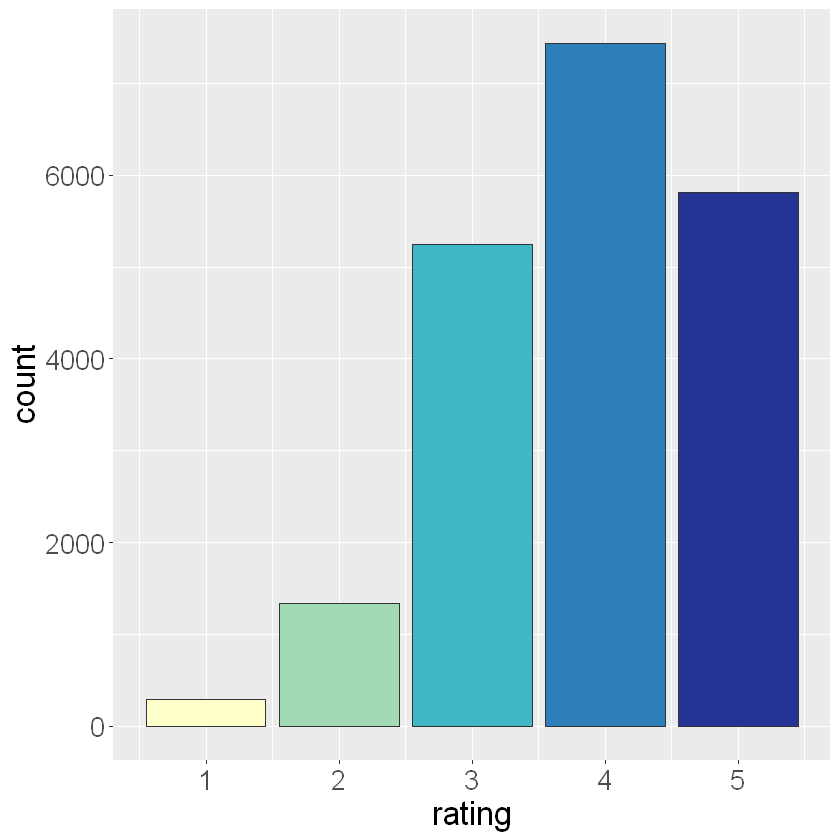

In [39]:
ggplot(data = ratings,aes(x = rating,fill = factor(rating))) + geom_bar(color = 'grey20') + scale_fill_brewer(palette = 'YlGnBu') + guides(fill = FALSE) + theme(text = element_text(size = 20))

#### Number of ratings per book

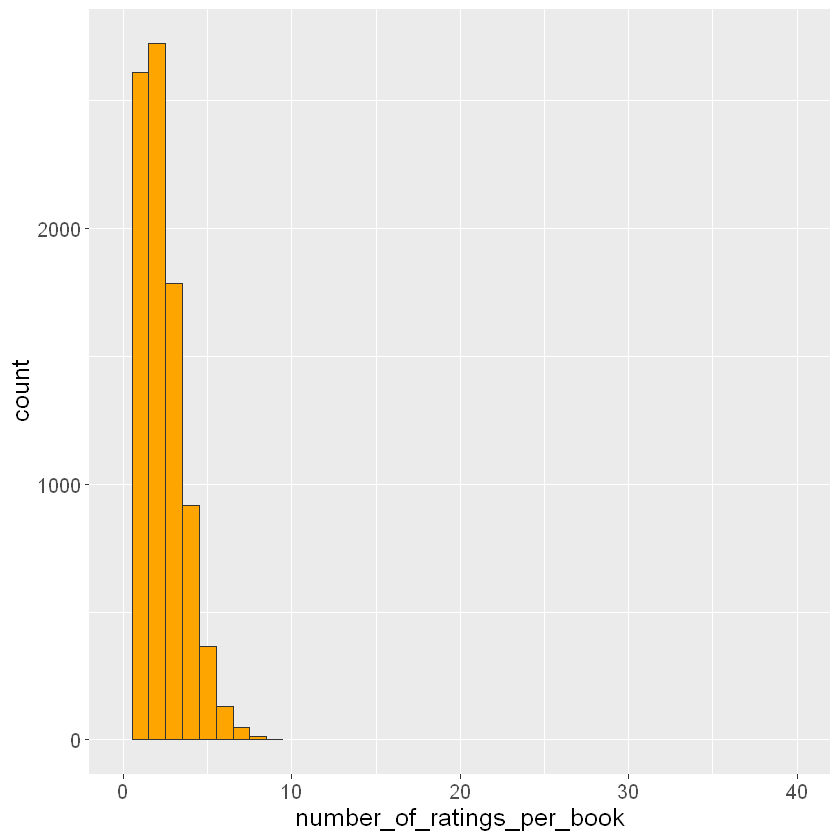

In [40]:
ratings %>% 
group_by(book_id) %>%
summarize(number_of_ratings_per_book = n()) %>%

ggplot(aes(number_of_ratings_per_book)) + 
geom_bar(fill = 'orange',col='grey20',width = 1) + coord_cartesian(c(0,40)) + 
theme(text = element_text(size = 15))

#### Finding the count of different genres

In [41]:
genres <- str_to_lower(c('Art','Biography','Business','Chick Lit',"Children's",'Christian','Classics','Comics','Cookbooks',
                         'Crime','Fantasy','Gay and Lesbian','Graphic Novels','Historical Fiction','History','Horror',
                         'Humor and Comedy','Manga','Memoir','Music','Mystery','Paranormal','Philosophy','Poetry','Psychology',
                        'Religion','Romance','Science','Science Fiction','Self Help','Suspence','Spirituality','Sports',
                        'Thriller','Travel','Young Adult'))

In [42]:
available_genres <- genres[str_to_lower(genres) %in% tags$tag_name]

In [43]:
available_genres

[1] "art"          "biography"    "business"     "christian"    "classics"    
 [6] "comics"       "cookbooks"    "crime"        "fantasy"      "history"     
[11] "horror"       "manga"        "memoir"       "music"        "mystery"     
[16] "paranormal"   "philosophy"   "poetry"       "psychology"   "religion"    
[21] "romance"      "science"      "suspence"     "spirituality" "sports"      
[26] "thriller"     "travel"

In [57]:
available_tags <- tags$tag_id[match(available_genres, tags$tag_name)]

In [58]:
available_tags

[1]  2938  4605  5951  7077  7457  7778  8150  8517 11305 14552 14821 19052
[13] 19733 20673 20939 22973 23471 23831 24526 25647 26138 26816 29073 28384
[25] 28422 30358 31155

In [62]:
ab = book_tags %>% filter(tag_id %in% 2938)

head(ab)

goodreads_book_id,tag_id,count
<dbl>,<dbl>,<dbl>
36,2938,31
119,2938,66
840,2938,63
960,2938,80
968,2938,242
1319,2938,291


In [46]:
book_tags %>% filter(tag_id %in% available_tags) %>%
group_by(tag_id) %>%
summarize(n = n()) %>%
ungroup() %>%
mutate(sumN = sum(n), percentage = n/sumN) %>%
arrange(-percentage) %>%
left_join(tags,by = 'tag_id') -> book_info

In [96]:
book_info

tag_id,n,sumN,percentage,tag_name
<dbl>,<int>,<int>,<dbl>,<chr>
11305,4259,34831,0.122276133,fantasy
26138,4251,34831,0.122046453,romance
20939,3686,34831,0.105825271,mystery
7457,2785,34831,0.079957509,classics
30358,2522,34831,0.072406764,thriller
14552,2138,34831,0.061382102,history
8517,2083,34831,0.059803049,crime
22973,1941,34831,0.055726221,paranormal
14821,1372,34831,0.039390198,horror


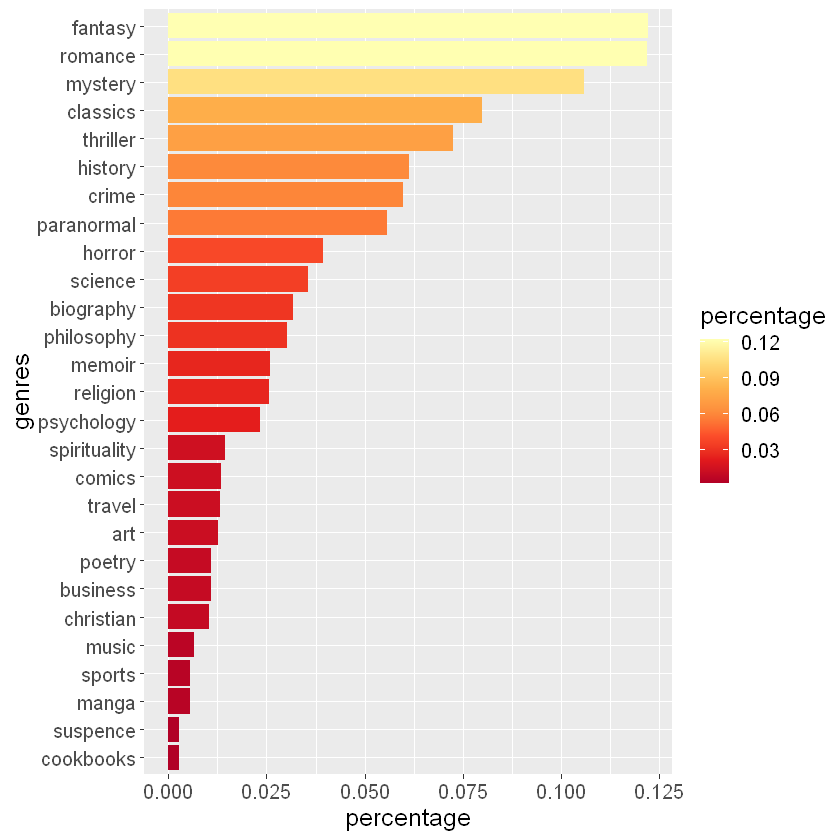

In [113]:
book_info %>% 
ggplot(aes(reorder(tag_name, percentage), percentage, fill = percentage)) + geom_bar(stat = 'identity') + coord_flip()+
scale_fill_distiller(palette = 'YlOrRd') + labs(y = 'percentage', x = 'genres') + theme(text = element_text(size = 15))

#### finding the  top_10 books with highest rating

In [116]:
books %>%
arrange(-average_rating) %>%
top_n(10,wt = average_rating) %>%
select(title, ratings_count, average_rating) -> top10

In [117]:
top10

title,ratings_count,average_rating
<chr>,<dbl>,<dbl>
The Complete Calvin and Hobbes,28900,4.82
"Words of Radiance (The Stormlight Archive, #2)",73572,4.77
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",33220,4.77
ESV Study Bible,8953,4.76
Mark of the Lion Trilogy,9081,4.76
It's a Magical World: A Calvin and Hobbes Collection,22351,4.75
"Harry Potter Boxset (Harry Potter, #1-7)",190050,4.74
There's Treasure Everywhere: A Calvin and Hobbes Collection,16766,4.74
"Harry Potter Collection (Harry Potter, #1-6)",24618,4.73


In [123]:
books %>%
arrange(-ratings_count) %>%
top_n(10,wt = ratings_count) %>%
select(title, ratings_count, average_rating) -> top_popular

In [124]:
top_popular

title,ratings_count,average_rating
<chr>,<dbl>,<dbl>
"The Hunger Games (The Hunger Games, #1)",4780653,4.34
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4602479,4.44
"Twilight (Twilight, #1)",3866839,3.57
To Kill a Mockingbird,3198671,4.25
The Great Gatsby,2683664,3.89
The Fault in Our Stars,2346404,4.26
The Hobbit,2071616,4.25
The Catcher in the Rye,2044241,3.79
Pride and Prejudice,2035490,4.24


#### Re-structuring our data to build collabrative Filtring

In [129]:
dimension_names = list(user_id = sort(unique(ratings$user_id)), book_id = sort(unique(ratings$book_id)))  
ratingmat = spread(select(ratings, book_id, user_id, rating), book_id, rating) %>% select(-user_id)

Adding missing grouping variables: `user_id`



In [130]:
class(ratingmat)

[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

In [131]:
ratingmat <- as.matrix(ratingmat)

In [132]:
ratingmat[1:5,1:5]

user_id,1,2,3,4
85,NA,NA,NA,NA
112,NA,NA,NA,NA
130,NA,NA,NA,NA
131,NA,NA,NA,NA
149,NA,NA,NA,NA


In [133]:
ratingmat[,-1] -> ratingmat

In [134]:
dimnames(ratingmat) <- dimension_names

In [139]:
ratingmat[1:5,1:5]

,1,2,3,4,5
85,NA,NA,NA,NA,NA
112,NA,NA,NA,NA,NA
130,NA,NA,NA,NA,NA
131,NA,NA,NA,NA,NA
149,NA,NA,NA,NA,NA


In [137]:
dim(ratingmat)

[1]  900 8630

#### converting the rating matrix into a real rating matrix

In [140]:
ratingmat0 <- ratingmat

In [141]:
dim(ratingmat0)

[1]  900 8630

In [145]:
ratingmat0[is.na(ratingmat0)] <- 0
sparse_ratings <- as(ratingmat0, 'sparseMatrix')
real_ratings <- new('realRatingMatrix',data = sparse_ratings)
real_ratings

900 x 8630 rating matrix of class 'realRatingMatrix' with 19630 ratings.

### Splitting the data into train & test

In [146]:
sample(x=c(T,F),size=nrow(real_ratings),replace = T, prob = c(0.8,0.2)) -> split_book

In [148]:
real_ratings[split_book,] -> recc_train
real_ratings[!split_book,] -> recc_test

#### Building the ubcf model

In [150]:
Recommender(data = recc_train,method = 'UBCF') -> recc_model_ubcf
n_recommended_ubcf <- 6

### Recommending books

In [152]:
predict(object=recc_model_ubcf,newdata=recc_test,n=n_recommended_ubcf) -> recc_predicted_ubcf

### * <font style = color:green>Recommending books for user number-1

In [153]:
recc_predicted_ubcf@items[[1]] -> user1_book_numbers
recc_predicted_ubcf@itemLabels[user1_book_numbers]

[1] "6038" "9534" "3085" "7209" "9312" "985"

In [162]:
books %>% filter(id==6038) %>% select(title,authors)
books %>% filter(id==9534) %>% select(title,authors)
books %>% filter(id==3085) %>% select(title,authors)
books %>% filter(id==7209) %>% select(title,authors)
books %>% filter(id==9312) %>% select(title,authors)
books %>% filter(id==985) %>% select(title,authors)

title,authors
<chr>,<chr>
Flyboys: A True Story of Courage,James D. Bradley


title,authors
<chr>,<chr>
Become a Better You: 7 Keys to Improving Your Life Every Day,Joel Osteen


title,authors
<chr>,<chr>
Narcissus and Goldmund,"Hermann Hesse, Ursule Molinaro"


title,authors
<chr>,<chr>
Paris,Edward Rutherfurd


title,authors
<chr>,<chr>
"Crimson Shore (Pendergast, #15)","Douglas Preston, Lincoln Child"


title,authors
<chr>,<chr>
The Big Short: Inside the Doomsday Machine,Michael Lewis


* <font style = color:green>Recommending books for user number-6

In [163]:
recc_predicted_ubcf@items[[6]] -> user6_book_numbers
recc_predicted_ubcf@itemLabels[user6_book_numbers]

[1] "8847" "5923" "4212" "8867" "2772" "3350"

In [164]:
books %>% filter(id==8847) %>% select(title,authors)
books %>% filter(id==5923) %>% select(title,authors)
books %>% filter(id==4212) %>% select(title,authors)
books %>% filter(id==8867) %>% select(title,authors)
books %>% filter(id==2772) %>% select(title,authors)
books %>% filter(id==3350) %>% select(title,authors)

title,authors
<chr>,<chr>
Rocket Boys (Coalwood #1),Homer Hickam


title,authors
<chr>,<chr>
The Sandman: Endless Nights,"Neil Gaiman, Barron Storey, Bill Sienkiewicz, Glenn Fabry, Dave McKean, P. Craig Russell, Milo Manara, Miguelanxo Prado, Frank Quitely, Todd Klein"


title,authors
<chr>,<chr>
The Son,"Jo Nesbø, Charlotte Barslund"


title,authors
<chr>,<chr>
There are No Children Here: The Story of Two Boys Growing Up in the Other America,Alex Kotlowitz


title,authors
<chr>,<chr>
Lilac Girls,Martha Hall Kelly


title,authors
<chr>,<chr>
"The Wizard Heir (The Heir Chronicles, #2)",Cinda Williams Chima
